In [4]:
import numpy as np

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from helper import *
from gauss_sadel import Gauss_Sadel
from tqdm import tqdm

## Inputs ###################

dx = 0.2
dy = 1

Lx = 1
Ly = 1

num_nodes_x = int(Lx / dx)
num_nodes_y = int(Ly / dy)


### Boundary Conditions
# T South : Temperature | 15
# T East  : Flux        | 5000
# T North : Temperature | 10
# T West  : Insulated   | 

H = 0.5
x_percentage = 0
y_percentage = 0
index_x = 0
index_y = 0



##############################

class node:
    def __init__(self):

        self.idx = None # Idx starts with 1 (i messed up)
        self.node_pos = None
        self.Cell_size_x = 5
        self.Cell_size_y = 5
        self.grid_face = None
        self.node_type = None 

        self.Gx = None # Location along the x axis
        self.Gy = None # Location along the y axis

        self.edge_color = "blue"

        self.edge_node_pos = []
        #    1
        # 0|   | 2
        #    3

        self.del_xe = None
        self.del_xn = None
        self.del_xw = None
        self.del_xs = None

# Initializing empty mesh
mesh = np.array([[node() for x in range(num_nodes_x)] for y in range(num_nodes_y)])

# Equidistant mesh gets created here
x_val = 0
y_val = 0

# the origin of the x and y axis is on the bottom left
idx = 0
for y in range(mesh.shape[0]):
    for x in range(mesh.shape[1]):
        cell = mesh[y][x]
        cell.idx = idx
        cell.Gx = x_val
        cell.Gy = y_val

        if y == 0: cell.edge_node_pos.append(3)
        if x == 0: cell.edge_node_pos.append(0)
        if x == (Ly/dy) - 1 : cell.edge_node_pos.append(2)
        if y == (Lx/dx) - 1 : cell.edge_node_pos.append(1)

        x_val += cell.Cell_size_x
        idx += 1
    x_val = 0
    y_val += cell.Cell_size_y


def strech_mesh(mesh: np.array, x_percentage, y_percentage, strech_function, index_x, index_y):
        if x_percentage == 0 and y_percentage == 0: # Edge case
            return mesh
        
        # Stretch in x
        if x_percentage != 0:
            for y in range(mesh.shape[0]):
                x_array_size = [mesh[y][x].Cell_size_x for x in range(mesh.shape[1])]
                stretched_array_size = strech_function(x_array_size, index_x, x_percentage)
                for x in range(mesh.shape[1]):
                    mesh[y][x].Cell_size_x = stretched_array_size[x]

        # Stretch in y
        if y_percentage != 0:
            for x in range(mesh.shape[1]):
                y_array_size = [mesh[y][x].Cell_size_y for y in range(mesh.shape[0])]
                stretched_array_size = strech_function(y_array_size, index_y, y_percentage)
                for y in range(mesh.shape[0]):
                    mesh[y][x].Cell_size_y = stretched_array_size[y]

        # Recompute coordinates AFTER both
        y_val = 0
        for y in range(mesh.shape[0]):
            x_val = 0
            for x in range(mesh.shape[1]):
                mesh[y][x].Gx = x_val
                mesh[y][x].Gy = y_val
                x_val += mesh[y][x].Cell_size_x
            y_val += mesh[y][0].Cell_size_y

        return mesh 

mesh = strech_mesh(mesh, x_percentage, y_percentage, strech_function = degrade_percentage, index_x=index_x, index_y=index_y)   
mesh[0]

array([<__main__.node object at 0x107e11d50>,
       <__main__.node object at 0x116c0f650>], dtype=object)

In [6]:
|.| .| .| .| .| 

SyntaxError: invalid syntax (2648098582.py, line 1)

In [ ]:
A

array([[ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.55,  1.  , -0.45,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.55,  1.  , -0.45,  0.  ,  0.  ],
       [ 0.  ,  0.  , -0.55,  1.  , -0.45,  0.  ],
       [ 0.  ,  0.  ,  0.  , -0.55,  1.  , -0.45],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ]])

# Central Difference

F = 2.5
D = 0.5
Peclet number Pe = F/D = 5.0

Coefficient Matrix A:
[[ 2.75  0.75  0.    0.    0.  ]
 [-1.75  1.    0.75  0.    0.  ]
 [ 0.   -1.75  1.    0.75  0.  ]
 [ 0.    0.   -1.75  1.    0.75]
 [ 0.    0.    0.   -1.75  0.25]]

RHS vector b:
[ 3.5  0.   0.   0.  -0. ]

Solution:
phi[0] at x=0.0: 1.0356
phi[1] at x=0.2: 0.8694
phi[2] at x=0.4: 1.2573
phi[3] at x=0.6: 0.3521
phi[4] at x=0.8: 2.4644


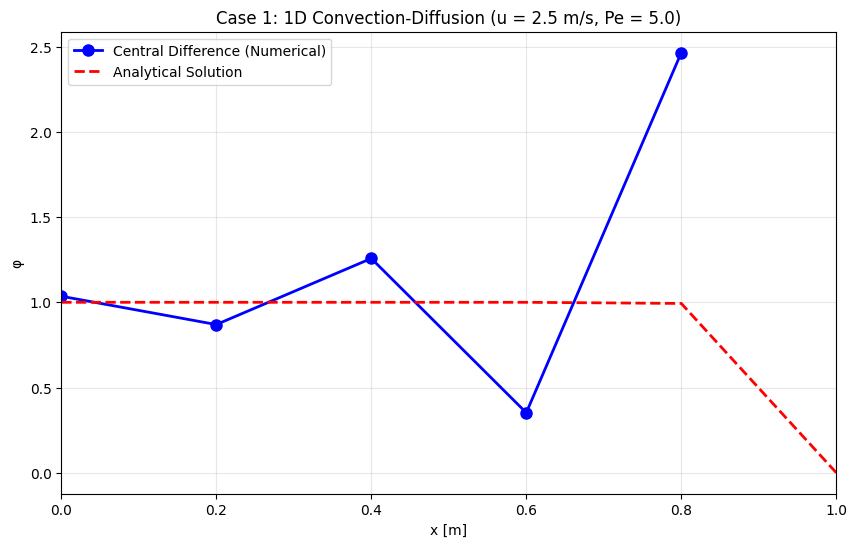


Comparison at each node:
Node	x[m]	Numerical	Analytical	Error
--------------------------------------------------
0	0.0	1.0356		1.0000		0.0356
1	0.2	0.8694		1.0000		0.1306
2	0.4	1.2573		1.0000		0.2573
3	0.6	0.3521		1.0000		0.6479
4	0.8	2.4644		0.9933		1.4711


In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Physical parameters
L = 1.0          # domain length [m]
N = 5            # number of cells
dx = L / N       # dx = 0.2 m
x_nodes = np.linspace(0, L, N+1)  # 6 nodes (0 to 5)
    
# Case 1 parameters
u = 2.5          # velocity [m/s]
rho = 1.0        # density [kg/m^3] 
Gamma = 0.1      # diffusion coefficient [m^2/s]

# Calculate F and D (as given in textbook)
F = rho * u      # F = 0.1
D = Gamma / dx   # D = 0.1/0.2 = 0.5

print(f"F = {F}")
print(f"D = {D}")
print(f"Peclet number Pe = F/D = {F/D}")

# Boundary conditions
phi_A = 1.0  # at x = 0
phi_B = 0.0  # at x = L

# Initialize coefficient matrix A and RHS vector b
# We solve for internal nodes 1, 2, 3, 4, 5 (excluding boundaries)
A = np.zeros((N, N))
b = np.zeros(N)

# Fill coefficients according to the table in your image
# Node 1
A[0, 0] = (D - F/2) + (2*D + F)    # aP = aE - -Sp
A[0, 1] = -(D - F/2) # aE = D - F/2, negative on LHS
b[0] = (2*D + F) * phi_A  # Su = (2D + F) * phi_A

# Nodes 2, 3, 4 (internal nodes)
for i in range(1, N-1):
    A[i, i-1] = -(D + F/2)  # aW = D + F/2, negative on LHS
    A[i, i] = 2*D           # aP = 0 in table, but mass conservation gives 2D
    A[i, i+1] = -(D - F/2)  # aE = D - F/2, negative on LHS
    b[i] = 0                # Su = 0

# Node 5
A[N-1, N-2] = -(D + F/2)  # aW = D + F/2, negative on LHS  
A[N-1, N-1] = (D + F/2) + (2*D - F)    # aP = aE - -Sp
b[N-1] = (2*D - F) * phi_B  # Su = (2D - F) * phi_B

print("\nCoefficient Matrix A:")
print(A)
print(f"\nRHS vector b:")
print(b)

# Solve the linear system
phi_internal = np.linalg.solve(A, b)

print(f"\nSolution:")
for i, val in enumerate(phi_internal):
    print(f"phi[{i}] at x={i*dx:.1f}: {val:.4f}")

# Analytical solution for comparison
Pe = F * L / D
x_ana = np.linspace(0, L, N+1)  # replace N+1 with your number of nodes

exp_term = np.exp(rho * u * x_ana / Gamma)
exp_term_L = np.exp(rho * u * L / Gamma)

phi_ana = phi_A + ((exp_term - 1) / (exp_term_L - 1)) * (phi_B - phi_A)


# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_nodes[:5], phi_internal[:5], 'bo-', linewidth=2, markersize=8, label='Central Difference (Numerical)')
plt.plot(x_ana, phi_ana, 'r--', linewidth=2, label='Analytical Solution')
plt.xlabel('x [m]')
plt.ylabel('φ')
plt.title(f'Case 1: 1D Convection-Diffusion (u = {u} m/s, Pe = {F/D})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.show()

# Print comparison
print(f"\nComparison at each node:")
print("Node\tx[m]\tNumerical\tAnalytical\tError")
print("-" * 50)
for i in range(len(phi_internal)):
    error = abs(phi_internal[i] - phi_ana[i])
    print(f"{i}\t{i*dx:.1f}\t{phi_internal[i]:.4f}\t\t{phi_ana[i]:.4f}\t\t{error:.4f}")


# Upwind

F = 2.5
D = 0.5
Peclet number Pe = F/D = 5.0

Solution:
phi[0] at x=0.0: 1.1665
phi[1] at x=0.2: 1.1658
phi[2] at x=0.4: 1.1613
phi[3] at x=0.6: 1.1343
phi[4] at x=0.8: 0.9722

Coefficient Matrix A:
[[ 3.5 -0.5  0.   0.   0. ]
 [-3.   3.5 -0.5  0.   0. ]
 [ 0.  -3.   3.5 -0.5  0. ]
 [ 0.   0.  -3.   3.5 -0.5]
 [ 0.   0.   0.  -3.   3.5]]

RHS vector b:
[ 3.5  0.   0.   0.  -0. ]


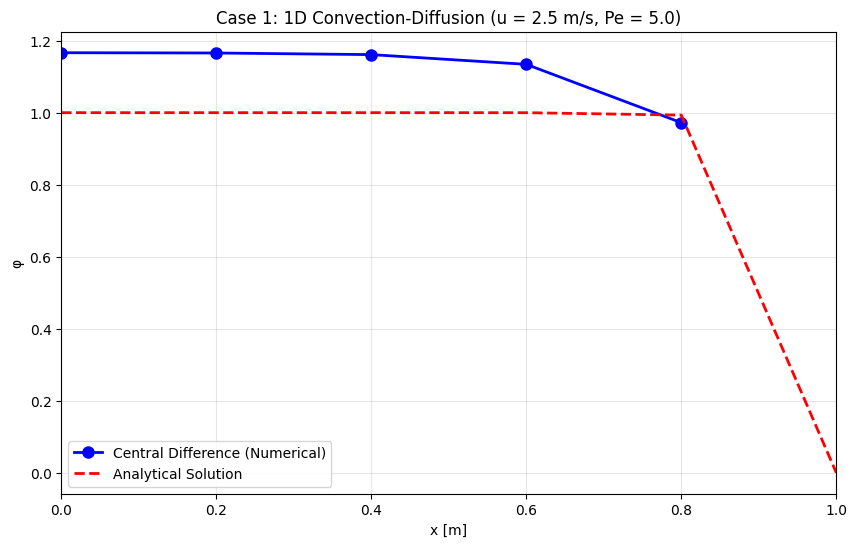


Comparison at each node:
Node	x[m]	Numerical	Analytical	Error
--------------------------------------------------
0	0.0	1.1665		1.0000		0.1665
1	0.2	1.1658		1.0000		0.1658
2	0.4	1.1613		1.0000		0.1613
3	0.6	1.1343		1.0000		0.1343
4	0.8	0.9722		0.9933		0.0210


In [72]:
# Physical parameters
L = 1.0          # domain length [m]
N = 5            # number of cells
dx = L / N       # dx = 0.2 m
x_nodes = np.linspace(0, L, N+1)  # 6 nodes (0 to 5)
    
# Case 1 parameters
u = 2.5          # velocity [m/s]
rho = 1.0        # density [kg/m^3] 
Gamma = 0.1      # diffusion coefficient [m^2/s]

# Calculate F and D (as given in textbook)
F = rho * u      # F = 0.1
D = Gamma / dx   # D = 0.1/0.2 = 0.5

print(f"F = {F}")
print(f"D = {D}")
print(f"Peclet number Pe = F/D = {F/D}")

# Boundary conditions
phi_A = 1.0  # at x = 0
phi_B = 0.0  # at x = L

# Initialize coefficient matrix A and RHS vector b
# We solve for internal nodes 1, 2, 3, 4, 5 (excluding boundaries)
A = np.zeros((N, N))
b = np.zeros(N)

# Node 1
A[0, 0] = (2*D + F)    # aP = aE - -Sp
A[0, 1] = -D
b[0] = (2*D + F) * phi_A  # Su = (2D + F) * phi_A

# Nodes 2, 3, 4 (internal nodes)
for i in range(1, N-1):
    A[i, i-1] = -(D + F )
    A[i, i] = 2*D + F 
    A[i, i+1] = -D  
    b[i] = 0  

# Node 5
A[N-1, N-2] = -(D + F)
A[N-1, N-1] = (2*D + F)
b[N-1] = (2*D - F) * phi_B 


# Solve the linear system
phi_internal = np.linalg.solve(A, b)

print(f"\nSolution:")
for i, val in enumerate(phi_internal):
    print(f"phi[{i}] at x={i*dx:.1f}: {val:.4f}")

print("\nCoefficient Matrix A:")
print(A)
print(f"\nRHS vector b:")
print(b)

# Analytical solution for comparison
Pe = F * L / D
x_ana = np.linspace(0, L, N+1)  # replace N+1 with your number of nodes

exp_term = np.exp(rho * u * x_ana / Gamma)
exp_term_L = np.exp(rho * u * L / Gamma)

phi_ana = phi_A + ((exp_term - 1) / (exp_term_L - 1)) * (phi_B - phi_A)



# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_nodes[:5], phi_internal[:5], 'bo-', linewidth=2, markersize=8, label='Central Difference (Numerical)')
plt.plot(x_ana, phi_ana, 'r--', linewidth=2, label='Analytical Solution')
plt.xlabel('x [m]')
plt.ylabel('φ')
plt.title(f'Case 1: 1D Convection-Diffusion (u = {u} m/s, Pe = {F/D})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.show()

# Print comparison
print(f"\nComparison at each node:")
print("Node\tx[m]\tNumerical\tAnalytical\tError")
print("-" * 50)
for i in range(len(phi_internal)):
    error = abs(phi_internal[i] - phi_ana[i])
    print(f"{i}\t{i*dx:.1f}\t{phi_internal[i]:.4f}\t\t{phi_ana[i]:.4f}\t\t{error:.4f}")



# Hybrid

In [71]:
F/D

5.0

F = 2.5
D = 0.5
Peclet number Pe = F/D = 5.0

Coefficient Matrix A:
[[ 3.5 -0.5  0.   0.   0. ]
 [-3.   3.5 -0.5  0.   0. ]
 [ 0.  -3.   3.5 -0.5  0. ]
 [ 0.   0.  -3.   3.5 -0.5]
 [ 0.   0.   0.  -3.   3.5]]

RHS vector b:
[ 3.5  0.   0.   0.  -0. ]

Solution:
phi[0] at x=0.0: 1.1665
phi[1] at x=0.2: 1.1658
phi[2] at x=0.4: 1.1613
phi[3] at x=0.6: 1.1343
phi[4] at x=0.8: 0.9722


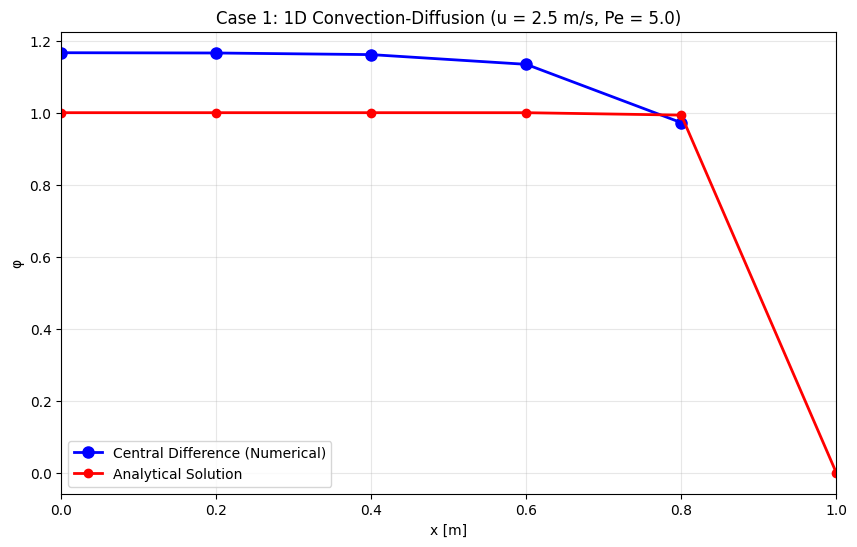


Comparison at each node:
Node	x[m]	Numerical	Analytical	Error
--------------------------------------------------
0	0.0	1.1665		1.0000		0.1665
1	0.2	1.1658		1.0000		0.1658
2	0.4	1.1613		1.0000		0.1613
3	0.6	1.1343		1.0000		0.1343
4	0.8	0.9722		0.9933		0.0210


In [74]:
# Physical parameters
L = 1.0          # domain length [m]
N = 5            # number of cells
dx = L / N       # dx = 0.2 m
x_nodes = np.linspace(0, L, N+1)  # 6 nodes (0 to 5)
    
# Case 1 parameters
u = 2.5          # velocity [m/s]
rho = 1.0        # density [kg/m^3] 
Gamma = 0.1      # diffusion coefficient [m^2/s]

# Calculate F and D (as given in textbook)
F = rho * u      # F = 0.1
D = Gamma / dx   # D = 0.1/0.2 = 0.5

print(f"F = {F}")
print(f"D = {D}")
print(f"Peclet number Pe = F/D = {F/D}")

# Boundary conditions
phi_A = 1.0  # at x = 0
phi_B = 0.0  # at x = L

# Initialize coefficient matrix A and RHS vector b
# We solve for internal nodes 1, 2, 3, 4, 5 (excluding boundaries)
A = np.zeros((N, N))
b = np.zeros(N)

# Fill coefficients according to the table in your image
if Pe < 2: # C-D
    A[0, 0] = (D - F/2) + (2*D + F)    # aP = aE - -Sp
    A[0, 1] = -(D - F/2) # aE = D - F/2, negative on LHS
    b[0] = (2*D + F) * phi_A  # Su = (2D + F) * phi_A
else: # Hybrid
    # Node 1
    A[0, 0] = (2*D + F)    # aP = aE - -Sp
    A[0, 1] = -D
    b[0] = (2*D + F) * phi_A  # Su = (2D + F) * phi_A

if Pe < 2: # C-D
    # Nodes 2, 3, 4 (internal nodes)
    for i in range(1, N-1):
        A[i, i-1] = -(D + F/2)  # aW = D + F/2, negative on LHS
        A[i, i] = 2*D           # aP = 0 in table, but mass conservation gives 2D
        A[i, i+1] = -(D - F/2)  # aE = D - F/2, negative on LHS
        b[i] = 0                # Su = 0
else: # Hybrid
    # Nodes 2, 3, 4 (internal nodes)
    for i in range(1, N-1):
        A[i, i-1] = -(D + F )
        A[i, i] = 2*D + F 
        A[i, i+1] = -D  
        b[i] = 0                # Su = 0
if Pe < 2: # C-D
    # Node 5
    A[N-1, N-2] = -(D + F/2)  # aW = D + F/2, negative on LHS  
    A[N-1, N-1] = (D + F/2) + (2*D - F)    # aP = aE - -Sp
    b[N-1] = (2*D - F) * phi_B             # Su = (2D - F) * phi_B
else: # Hybrid
    # Node 5
    A[N-1, N-2] = -(D + F)
    A[N-1, N-1] = (2*D + F)
    b[N-1] = (2*D - F) * phi_B 

print("\nCoefficient Matrix A:")
print(A)
print(f"\nRHS vector b:")
print(b)

# Solve the linear system
phi_internal = np.linalg.solve(A, b)

print(f"\nSolution:")
for i, val in enumerate(phi_internal):
    print(f"phi[{i}] at x={i*dx:.1f}: {val:.4f}")

# Analytical solution for comparison
Pe = F * L / D

x_ana = np.linspace(0, L, N+1)  # replace N+1 with your number of nodes

exp_term = np.exp(rho * u * x_ana / Gamma)
exp_term_L = np.exp(rho * u * L / Gamma)

phi_ana = phi_A + ((exp_term - 1) / (exp_term_L - 1)) * (phi_B - phi_A)


# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_nodes[:N], phi_internal, 'bo-', linewidth=2, markersize=8, label='Central Difference (Numerical)')
plt.plot(x_ana, phi_ana, 'ro-', linewidth=2, label='Analytical Solution')
plt.xlabel('x [m]')
plt.ylabel('φ')
plt.title(f'Case 1: 1D Convection-Diffusion (u = {u} m/s, Pe = {F/D})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.show()

# Print comparison
print(f"\nComparison at each node:")
print("Node\tx[m]\tNumerical\tAnalytical\tError")
print("-" * 50)
for i in range(len(phi_internal)):
    error = abs(phi_internal[i] - phi_ana[i])
    print(f"{i}\t{i*dx:.1f}\t{phi_internal[i]:.4f}\t\t{phi_ana[i]:.4f}\t\t{error:.4f}")


In [47]:
x_ana

array([ 1.05753017e-05, -2.71824251e+00, -1.01072205e+01, -3.01925450e+01,
       -8.47901176e+01, -2.33201707e+02, -6.36626234e+02, -1.73324780e+03,
       -4.71417426e+03, -1.28171725e+04, -3.48434054e+04, -9.47169139e+04,
       -2.57469984e+05, -6.99878697e+05, -1.90247026e+06, -5.17145307e+06,
       -1.40574696e+07, -3.82121669e+07, -1.03871442e+08, -2.82351855e+08,
       -7.67511920e+08, -2.08631371e+09, -5.67118864e+09, -1.54158890e+10,
       -4.19047310e+10, -1.13908869e+11])